In [2]:
import tensorflow as tf
from classes import dbhandler
from classes import performance
from classes import riotrequester
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import csv

2023-03-22 01:24:27.721120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 01:24:27.982300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 01:24:27.982324: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-22 01:24:29.195966: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [27]:
# Pobranie danych
with open("aram_data.csv", "r", newline="") as f:
    reader = csv.reader(f)
    data = list(reader)
data_1 = []
# Konwersja str na float
for row in data:
    data_1.append([float(x) for x in row])
values, v, labels = [], [], []
for row in data_1:#[:2000]:
    values.append(row[:10])
    v.append(row[:10])
    labels.append([row[10]])
values = np.array(values)
labels = np.array(labels)

In [75]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(10,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(values, labels, epochs=100, validation_split=0.1)

Epoch 1/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4949 - accuracy: 0.7565 - val_loss: 0.4702 - val_accuracy: 0.7709
Epoch 2/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4682 - accuracy: 0.7723 - val_loss: 0.4696 - val_accuracy: 0.7755
Epoch 3/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4643 - accuracy: 0.7740 - val_loss: 0.4647 - val_accuracy: 0.7749
Epoch 4/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4605 - accuracy: 0.7761 - val_loss: 0.4624 - val_accuracy: 0.7761
Epoch 5/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4583 - accuracy: 0.7762 - val_loss: 0.4626 - val_accuracy: 0.7757
Epoch 6/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4574 - accuracy: 0.7767 - val_loss: 0.4601 - val_accuracy: 0.7769
Epoch 7/100
1394/1394 [==============================] - 2s 1ms/step - loss: 0.4560 - accuracy: 0.7763 - val_loss: 0.4597 - val_ac

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 48ms/step


<Axes: ylabel='Count'>

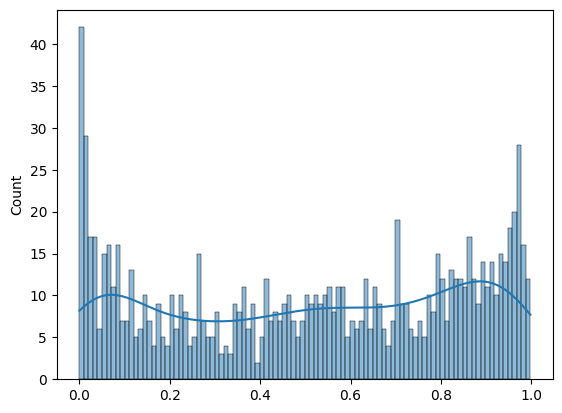

In [76]:
predicted = [model.predict([i]) for i in v[:1000]]
p = [x[0,0] for x in predicted]
sns.histplot(p, kde=True, bins=100)

<Axes: ylabel='Count'>

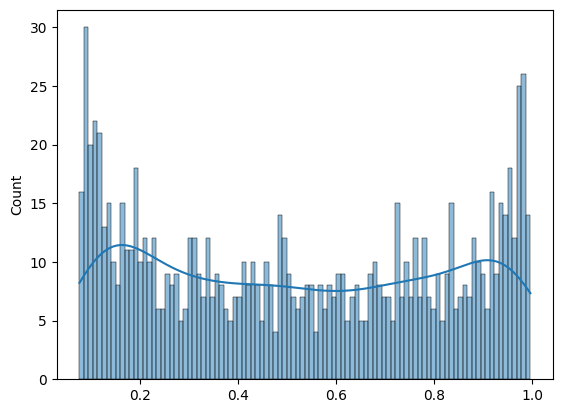

In [58]:
sns.histplot(p, kde=True, bins=100) 1

<Axes: ylabel='Count'>

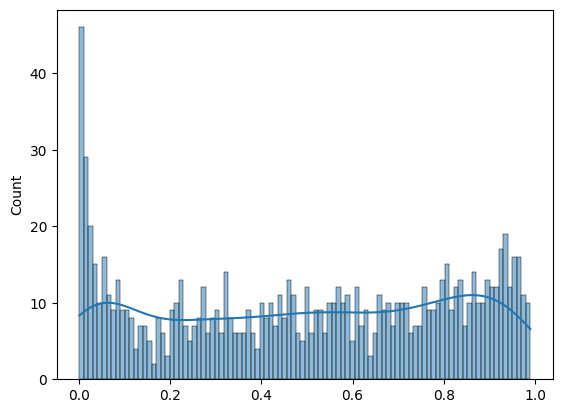

<Axes: ylabel='Count'>

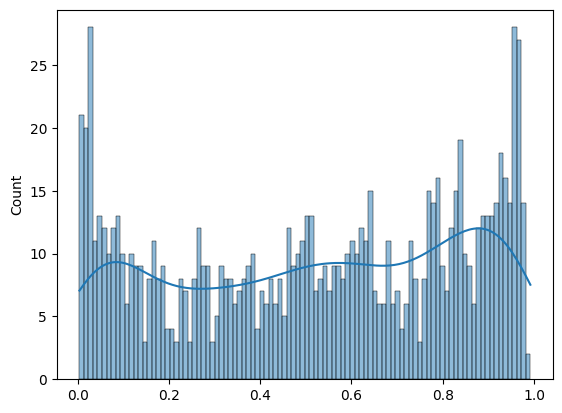

In [62]:
sns.histplot(p, kde=True, bins=100) 10

<Axes: ylabel='Count'>

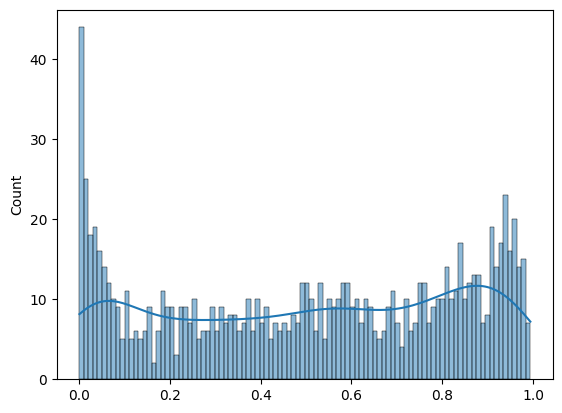

In [66]:
sns.histplot(p, kde=True, bins=100) 100

<Axes: ylabel='Count'>

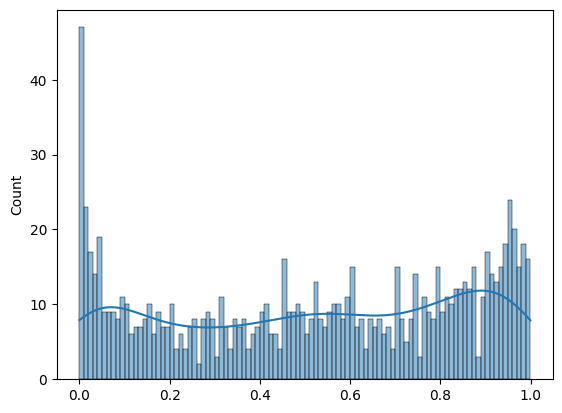

In [69]:
sns.histplot(p, kde=True, bins=100) 1000

In [77]:
model.load()

AttributeError: 'Sequential' object has no attribute 'load'

In [102]:
m.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [100]:
x = m.predict(values)

1549/1549 [==============================] - 1s 814us/step


In [1]:
sns.histplot(x, kde=True, bins=100)

NameError: name 'sns' is not defined

In [97]:
x =sorted(x, key=lambda i: i[0])

In [98]:
x

[array([0.00054246], dtype=float32),
 array([0.00061381], dtype=float32),
 array([0.00061604], dtype=float32),
 array([0.00077296], dtype=float32),
 array([0.00078063], dtype=float32),
 array([0.00079187], dtype=float32),
 array([0.00079373], dtype=float32),
 array([0.00080138], dtype=float32),
 array([0.00084248], dtype=float32),
 array([0.00086996], dtype=float32),
 array([0.00091677], dtype=float32),
 array([0.00099171], dtype=float32),
 array([0.00100495], dtype=float32),
 array([0.00100511], dtype=float32),
 array([0.00103031], dtype=float32),
 array([0.0010735], dtype=float32),
 array([0.00109011], dtype=float32),
 array([0.00110663], dtype=float32),
 array([0.00111189], dtype=float32),
 array([0.00111293], dtype=float32),
 array([0.00113247], dtype=float32),
 array([0.0011478], dtype=float32),
 array([0.00121031], dtype=float32),
 array([0.00121497], dtype=float32),
 array([0.00128227], dtype=float32),
 array([0.00128314], dtype=float32),
 array([0.0013028], dtype=float32),
 arr

In [107]:
testing = [[0,0,0,0,0,0,0,0,0,0]]
for i in range(10):
    row = [0,0,0,0,0,0,0,0,0,0]
    row[i] = 1
    testing.append(row)
p = m.predict(testing)

1/1 [==============================] - 0s 30ms/step


In [113]:
p1 = p*10000
p1.astype(np.int32)

array([[ 790],
       [9296],
       [9881],
       [ 497],
       [   1],
       [9629],
       [ 884],
       [2151],
       [8873],
       [7829],
       [1800]], dtype=int32)